In [1]:
import pandas as pd
import numpy as np 

In [2]:
file=pd.read_csv("Mall_Customers.csv")

In [5]:
file.drop("CustomerID",axis=1)

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
5,Female,22,17,76
6,Female,35,18,6
7,Female,23,18,94
8,Male,64,19,3
9,Female,30,19,72


In [11]:
file.keys()

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
grp=file.groupby("Genre")

In [31]:
for Genre , Genre_file in grp:
    print(Genre)
    print(Genre_file)

Female
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
5             6  Female   22                  17                      76
6             7  Female   35                  18                       6
7             8  Female   23                  18                      94
9            10  Female   30                  19                      72
11           12  Female   35                  19                      99
12           13  Female   58                  20                      15
13           14  Female   24                  20                      77
16           17  Female   35                  21                      35
19           20  Female   35                  23                      98
22           23  Female   46                

In [33]:
male=grp.get_group("Male")

In [34]:
female=grp.get_group("Female")

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

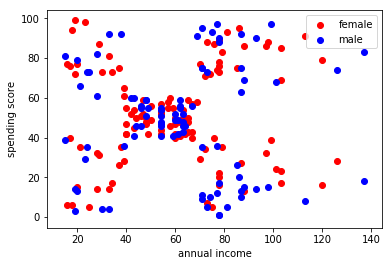

In [44]:
plt.scatter(female["Annual Income (k$)"],female["Spending Score (1-100)"],color="red",label="female")
plt.scatter(male["Annual Income (k$)"],male["Spending Score (1-100)"],c="blue",label="male")
plt.xlabel("annual income")
plt.ylabel("spending score")
plt.legend()

In [45]:
from sklearn.cluster import KMeans

In [48]:
X=file.iloc[:,[3,4]].values

In [51]:
cluster=KMeans(n_clusters=5,random_state=42)

In [52]:
model=cluster.fit(X)

In [53]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [54]:
model.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [56]:
model.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

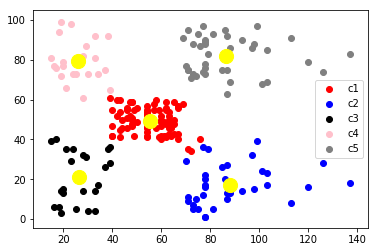

In [72]:
plt.scatter(X[model.labels_==0,0],X[model.labels_==0,1],c="red",label="c1")
plt.scatter(X[model.labels_==1,0],X[model.labels_==1,1],c="blue",label="c2")
plt.scatter(X[model.labels_==2,0],X[model.labels_==2,1],c="black",label="c3")
plt.scatter(X[model.labels_==3,0],X[model.labels_==3,1],c="pink",label="c4")
plt.scatter(X[model.labels_==4,0],X[model.labels_==4,1],c="grey",label="c5")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,c="yellow")

plt.legend()

In [67]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)